# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


## Get data

### Import keras and CIFAR10 data

In [74]:
import keras
from keras.datasets import cifar10

### Get train and test data
Use these variable names

X_train, X_test, y_train, y_test

In [75]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Print the shape of X_train and y_train

In [76]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


### Rehshape y_train and y_test
reshape with y_train.shape[0] and y_test.shape[0]

In [77]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

In [78]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

### Create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [79]:
X_train_lt_5 = X_train[y_train < 5]
y_train_lt_5 = y_train[y_train < 5]
X_test_lt_5 = X_test[y_test < 5]
y_test_lt_5 = y_test[y_test < 5]

X_train_gt_5 = X_train[y_train >= 5]
y_train_gt_5 = y_train[y_train >= 5]
X_test_gt_5 = X_test[y_test >= 5]
y_test_gt_5 = y_test[y_test >= 5]

## Use One-hot encoding to divide y_train and y_test into required no of output classes
Do it for both datasets

In [80]:
y_train_gt_5 = pd.get_dummies(y_train_gt_5)
y_test_gt_5 = pd.get_dummies(y_test_gt_5)

y_train_lt_5 = pd.get_dummies(y_train_lt_5)
y_test_lt_5 = pd.get_dummies(y_test_lt_5)

In [81]:
y_train_gt_5

,5,6,7,8,9
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


### Print data variables for dataset having classes from 0 to 4
Data variables here are referring to X-train, X_test, y_train, y_test of that dataset

In [82]:
display(X_train_gt_5.shape)
display(X_train_lt_5.shape)
display(y_train_gt_5.shape)
display(y_train_lt_5.shape)

display(X_test_gt_5.shape)
display(X_test_lt_5.shape)
display(y_test_gt_5.shape)
display(y_test_lt_5.shape)

(25000, 32, 32, 3)

(25000, 32, 32, 3)

(25000, 5)

(25000, 5)

(5000, 32, 32, 3)

(5000, 32, 32, 3)

(5000, 5)

(5000, 5)

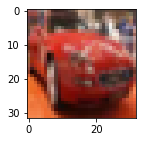

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(2,2))
img = X_train[5]
plt.imshow(img)

### Print data variables for dataset having classes from 5 to 9
Data variables here are referring to X-train, X_test, y_train, y_test of that dataset

## Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

### Import required libraries

In [48]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D,Flatten,Dropout

### Initialize a model and add the required layers

In [65]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), name='conv_1'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, name='pool_1'))
model.add(Dropout(0.2,name='drop_1'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), name='conv_2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, name='pool_2'))
model.add(Dropout(0.2, name='drop_2'))
model.add(Flatten())
model.add(Dense(120, activation='relu', name='dense_1'))

model.add(Dense(5, activation='softmax', name='dense_3'))

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=categorical_crossentropy, metrics=['accuracy'])

### Summarize your model

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 15, 15, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 15, 15, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 13, 13, 64)        18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 6, 6, 64)          0         
_________________________________________________________________
drop_2 (Dropout)             (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

### Compile and fit the model

In [67]:
model.fit(X_train_lt_5, y_train_lt_5, validation_data=(X_test_lt_5,y_test_lt_5),
         epochs=30, batch_size=32,verbose=1)

Train on 25000 samples, validate on 5000 samples
Epoch 1/30
25000/25000 [==============================] - 27s 1ms/step - loss: 2.4029 - accuracy: 0.4348 - val_loss: 1.0425 - val_accuracy: 0.5836
Epoch 2/30
25000/25000 [==============================] - 27s 1ms/step - loss: 1.0198 - accuracy: 0.5855 - val_loss: 0.8877 - val_accuracy: 0.6470
Epoch 3/30
25000/25000 [==============================] - 26s 1ms/step - loss: 0.9303 - accuracy: 0.6300 - val_loss: 0.9009 - val_accuracy: 0.6636
Epoch 4/30
25000/25000 [==============================] - 26s 1ms/step - loss: 0.8512 - accuracy: 0.6703 - val_loss: 0.8542 - val_accuracy: 0.6760
Epoch 5/30
25000/25000 [==============================] - 26s 1ms/step - loss: 0.7888 - accuracy: 0.6970 - val_loss: 0.8295 - val_accuracy: 0.6770
Epoch 6/30
25000/25000 [==============================] - 27s 1ms/step - loss: 0.7433 - accuracy: 0.7156 - val_loss: 0.7428 - val_accuracy: 0.7198
Epoch 7/30
25000/25000 [==============================] - 27s 1ms/ste

### Evaluate your model

In [68]:
model.evaluate(X_test_lt_5, y_test_lt_5)

5000/5000 [==============================] - 1s 243us/step


[0.8215060812950135, 0.7649999856948853]

## In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [69]:
for layer in model.layers:
    if('dense' not in layer.name):
        layer.trainable = False

### Print in colors

In [70]:
#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
pool_1
False
drop_1
False
conv_2
False
pool_2
False
drop_2
False
flatten_1
False
dense_1
True
dense_3
True


## Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [84]:
model.compile(optimizer=optimizer,loss=categorical_crossentropy, metrics=['accuracy'])
model.fit(X_train_gt_5, y_train_gt_5, validation_data=(X_test_gt_5,y_test_gt_5),
         epochs=30, batch_size=32,verbose=1)

Train on 25000 samples, validate on 5000 samples
Epoch 1/30
25000/25000 [==============================] - 10s 415us/step - loss: 0.9762 - accuracy: 0.6616 - val_loss: 0.6721 - val_accuracy: 0.7540
Epoch 2/30
25000/25000 [==============================] - 11s 430us/step - loss: 0.6380 - accuracy: 0.7723 - val_loss: 0.5908 - val_accuracy: 0.7926
Epoch 3/30
25000/25000 [==============================] - 10s 405us/step - loss: 0.5572 - accuracy: 0.8039 - val_loss: 0.5551 - val_accuracy: 0.8064
Epoch 4/30
25000/25000 [==============================] - 10s 416us/step - loss: 0.5122 - accuracy: 0.8179 - val_loss: 0.5363 - val_accuracy: 0.8110
Epoch 5/30
25000/25000 [==============================] - 10s 414us/step - loss: 0.4762 - accuracy: 0.8304 - val_loss: 0.5344 - val_accuracy: 0.8090
Epoch 6/30
25000/25000 [==============================] - 11s 421us/step - loss: 0.4509 - accuracy: 0.8397 - val_loss: 0.5298 - val_accuracy: 0.8150
Epoch 7/30
25000/25000 [==============================] -